<a href="https://colab.research.google.com/github/JISOO0213/MidProject_NewsCategory/blob/main/%EC%A4%91%EA%B0%84%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%89%B4%EC%8A%A4_%EA%B8%B0%EC%82%AC_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%B6%84%EB%A5%98_%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install sentencepiece # 토크나이저 인스톨

In [ ]:
# imports
import argparse # 자주 사용하게 될 SEED 값이나 경로 등을 딕셔너리 형태로 저장해주는 모듈 
import os  # 운영체제 제어 
import random  # 랜덤
import shutil # 쉘 명령어 등을 대신 실행해주는 유틸 
import json
import zipfile # 압축 푸는 애
import math 
import copy
import collections  # dict 형태의 자료들을 좀더 쉽게 사용할 수 있게 만들어주는 패키지  - counter: 각 dict에 있는 빈도 세어주는 역할
import re  # 정규식에 의해 텍스트 데이터를 찾을 때 사용

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sentencepiece as spm  # 토크나이저
import tensorflow as tf
import tensorflow.keras.backend as K

from tqdm.notebook import tqdm, trange   # 작업량을 막대그래프로 표시 
import tensorflow as tf
import tensorflow_datasets as tfds #Dataset API
from PIL import Image #Manipulate Images
import warnings
warnings.filterwarnings('ignore') #ignores warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. 내용확인

In [ ]:
train_text = pd.read_csv('drive/MyDrive/ITStudy/data/train.csv')
test_text = pd.read_csv('drive/MyDrive/ITStudy/data/test.csv')

In [ ]:
train_text

,text,category
0,이에 따른다면 초등학생들의 소비 문화는 디지털 강국의 ‘개국 공신’이 되려는 몸부림...,연예/문화
1,"""지난 14일 우리정부가 난민 신청을 한 예멘인들에 대해 인도적 체류를 허가했는데요...",연예/문화
2,인천시 서구와 계양구에서 경기도 부천을 거쳐 서울 홍대까지 지하철이 건설될 것으로 ...,생활
3,김성태 자유한국당 의원이 최근 황운하 울산경찰청장과 벌인 ‘미친개’ 공방을 언급하며...,정치
4,"""지난해 사상 최대 실적을 거뒀던 우리 수출이 새해에도 좋은 흐름을 이어갔습니다. ...",스포츠
...,...,...
37643,"뉴욕 대화 이후 북한이 추가 북미대화와 조기 협상재개를 강조하고 있는 반면, 미국은...",정치
37644,"""프로농구 DB의 두경민이 생애 첫 최우수 선수의 영광을 안았습니다. 무명 설움을 ...",스포츠
37645,대한치과의사협회가 '공정위가 증거를 조작했다는 의혹이 있다'고 주장해 파문이 일고 ...,생활
37646,"""세상의 종말을 느꼈다 필리핀 주민은 올해 가장 강력한 태풍인 &망쿳&의 위력을 이...",연예/문화


In [ ]:
# 카테고리별로 묶어서 text 확인
temp = train_text.groupby('category')
li = [line for line in temp]

c1 = li[0][1]   
c2 = li[1][1]
c3 = li[2][1]
c4 = li[3][1]
c5 = li[4][1]
c6 = li[5][1]

In [ ]:
c6

,text,category
3,김성태 자유한국당 의원이 최근 황운하 울산경찰청장과 벌인 ‘미친개’ 공방을 언급하며...,정치
8,"""전교조는 지난 2013년 조합원 가운데 해직자 9명이 포함 됐다는 이유로 지난 2...",정치
9,"""이제 북미간의 협상이 본격적인 해법찾기 국면에 접어든 게 아닌가 싶습니다. 그럼,...",정치
14,검찰이 이명박 전 대통령 시기 국가정보원 특수활동비 상납 사건 수사를 계속하고 있습...,정치
21,"""재정정보 유출 의혹을 받고 있는 자유한국당 심재철 의원이 오늘(28일)도 청와대를...",정치
...,...,...
37609,"""[기자] 이명박 전 대통령에게 적용된 혐의는 10여 개인데요, 그 가운데 핵심은 ...",정치
37610,이라크 총선 개표가 진행되고 있는 가운데 지금까지 개표 결과 이슬람 시아파 정당 연...,정치
37636,"""트럼프 미국 대통령에 이어 해리스 주한미대사 지명자도 한미연합훈련을 중단한 필요성...",정치
37638,민주통합당 대선후보 선출을 위한 선거인단 신청자가 20만명을 넘어섰다. 민주당 중앙...,정치


In [ ]:
c1_label = c1['category']
c1.drop('category', axis = 1, inplace = True)
c2_label = c2['category']
c2.drop('category', axis = 1, inplace = True)
c3_label = c3['category']
c3.drop('category', axis = 1, inplace = True)
c4_label = c4['category']
c4.drop('category', axis = 1, inplace = True)
c5_label = c5['category']
c5.drop('category', axis = 1, inplace = True)
c6_label = c6['category']
c6.drop('category', axis = 1, inplace = True)

c1 - 경제

c2 - 사회

c3 - 생활 

c4 - 스포츠

c5 - 연예/문화

c6 - 정치




In [ ]:
target = train_text.category

In [ ]:
target

0        연예/문화
1        연예/문화
2           생활
3           정치
4          스포츠
         ...  
37643       정치
37644      스포츠
37645       생활
37646    연예/문화
37647    연예/문화
Name: category, Length: 37648, dtype: object

In [ ]:
train_text = train_text.drop('category', axis = 1)

In [ ]:
train_text

,text
0,이에 따른다면 초등학생들의 소비 문화는 디지털 강국의 ‘개국 공신’이 되려는 몸부림...
1,"""지난 14일 우리정부가 난민 신청을 한 예멘인들에 대해 인도적 체류를 허가했는데요..."
2,인천시 서구와 계양구에서 경기도 부천을 거쳐 서울 홍대까지 지하철이 건설될 것으로 ...
3,김성태 자유한국당 의원이 최근 황운하 울산경찰청장과 벌인 ‘미친개’ 공방을 언급하며...
4,"""지난해 사상 최대 실적을 거뒀던 우리 수출이 새해에도 좋은 흐름을 이어갔습니다. ..."
...,...
37643,"뉴욕 대화 이후 북한이 추가 북미대화와 조기 협상재개를 강조하고 있는 반면, 미국은..."
37644,"""프로농구 DB의 두경민이 생애 첫 최우수 선수의 영광을 안았습니다. 무명 설움을 ..."
37645,대한치과의사협회가 '공정위가 증거를 조작했다는 의혹이 있다'고 주장해 파문이 일고 ...
37646,"""세상의 종말을 느꼈다 필리핀 주민은 올해 가장 강력한 태풍인 &망쿳&의 위력을 이..."


In [ ]:
# category 별로 LabelEncoder 적용
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(target)
target = encoder.transform(target)
target

array([4, 4, 2, ..., 2, 4, 4])

In [ ]:
mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))
mapping

{0: '경제', 1: '사회', 2: '생활', 3: '스포츠', 4: '연예/문화', 5: '정치'}

# 3. Char Tokenizer

[ , ] , / , = , & , 

In [ ]:
 # train 데이터 전처리
 # 참고: https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
import re

def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9]", " ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


In [ ]:
# 카테고리별로 불필요한 특수문자 제거
train_X_cleaned1 = [clean_str(sentence) for sentence in c1.text]
train_X_cleaned_split1 = [sentence.split() for sentence in train_X_cleaned1]
train_X_cleaned2 = [clean_str(sentence) for sentence in c2.text]
train_X_cleaned_split2 = [sentence.split() for sentence in train_X_cleaned2]
train_X_cleaned3 = [clean_str(sentence) for sentence in c3.text]
train_X_cleaned_split3 = [sentence.split() for sentence in train_X_cleaned3]
train_X_cleaned4 = [clean_str(sentence) for sentence in c4.text]
train_X_cleaned_split4 = [sentence.split() for sentence in train_X_cleaned4]
train_X_cleaned5 = [clean_str(sentence) for sentence in c5.text]
train_X_cleaned_split5 = [sentence.split() for sentence in train_X_cleaned5]
train_X_cleaned6 = [clean_str(sentence) for sentence in c6.text]
train_X_cleaned_split6 = [sentence.split() for sentence in train_X_cleaned6]

## 4. 모델 (LSTM)

In [ ]:
# train 데이터 전처리
train_X_cleaned = [clean_str(sentence) for sentence in train_text.text]
train_X_cleaned_split = [sentence.split() for sentence in train_X_cleaned]
train_X_cleaned[:3]

['이에 따른다면 초등학생들의 소비 문화는 디지털 강국의 개국 공신 이 되려는 몸부림으로 여길 수도 있다 하지만 지나친 부모의 교육열이 부른 무분별한 소비라는 지적도 만만치 않다 경기도 수원의 한 초등학교 교사는 수업 시간에 휴대전화로 문자를 주고받기에 혼냈더니 다음날 부모가 찾아와 내 아이 문제에 끼어들지 말라 고 했다 요즘 초등학생들은 서구적 가치관도 전통적 가치관도 지니지 못한 경우가 많다 고 고민을 토로했다 사진 5 BOX 요즘 아프트 놀이터에서 초등학생을 찾기는 쉽지 않다 지금 아이들은 학원과 PC방을 전전하고 있는지도 모른다 요즘 취학하는 아이들은 심각한 주의력 결핍증이 있다고 한다 유아기 때부터 온갖 시각 영상물에 노출된 탓이다 다양한 시각 정보를 처리하는 데 익숙하더라도 그 속에서 소비 욕구만 자극받는다면 헛일이다 인터넷 게임을 넓은 화면에서 즐기고 싶다며 벽걸이형 PDP Plasma Display Panel 텔레비전 구입을 요구하는 아이에게 무슨 말을 할 수 있을까 언제까지 자녀와의 친밀도를 경제력 으로 확인할 수도 없는 일 아닌가 참교육을 위한 전국 학부모회 장은숙 사무처장은 올바른 디지털 소비문화 기준을 세워서 적용해야 한다 적어도 무엇 때문에 필요한지에 대해 식탁 토론 이라도 벌이는 게 중요하다 고 말한다 글 한겨레21 바로가기',
 ' 지난 14일 우리정부가 난민 신청을 한 예멘인들에 대해 인도적 체류를 허가했는데요 난민 체류 허가 뒤 맞이한 첫 주말 서울 도심에선 도로 하나를 사이에 두고난민에 대한 서로 다른 목소리가 터져나왔습니다 강병수 기자가 현장에 다녀왔습니다 리포트 정부의 제주도 예멘 난민 일부에 대한 인도적 체류 허가 뒤 맞은 첫 주말 난민 찬성을 주장하는 집회에서는 인도적 체류만으로는 아직 갈 길이 멀다는 지적이 나왔습니다 이정원 난민 찬성 집회 참가자 예멘 난민들에 대해 난민으로 인정할 수 없다고 결정했습니다 누구는 난민이고 누구는 난민이 아닐 수 없고 난민이 아니라는 정부의 판단이 잘못됐다고 생각합니다 문제는 난민 자체가

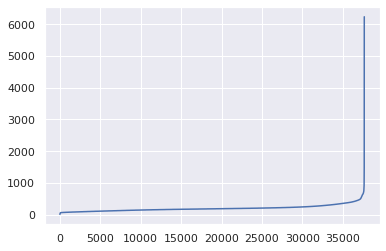

10


In [ ]:
# 전체 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in train_X_cleaned_split]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [ ]:
np.mean([len(x) for x in train_X_cleaned_split])

202.76646833829153

## 그래프로 확인하고 train 데이터의 문장 길이들의 평균을 조사해봤는데 200 라인이 나왔다. 
## 그러나 단어를 많이 나온 순서대로 정렬해 놓은 상태가 아니기 때문에 너무 긴 문장 길이는 오히려 학습에 악영향을 끼칠 수 있으므로 학습속도와 정확도를 고려하여 적절하게 조절하였다.

## 다만, 좀 더 시간이 주어진다면 상위 단어들을 학습에 이용하여 학습에 얼마나 차이가 있는지 비교하면 좋을 거 같다.

In [ ]:
# 단어 정제 및 문장 길이 일정화
sentences_new = []
for sentence in train_X_cleaned_split:
    sentences_new.append([word[:5] for word in sentence][:50])
sentences = sentences_new
for i in range(5): 
    print(sentences[i])

['이에', '따른다면', '초등학생들', '소비', '문화는', '디지털', '강국의', '개국', '공신', '이', '되려는', '몸부림으로', '여길', '수도', '있다', '하지만', '지나친', '부모의', '교육열이', '부른', '무분별한', '소비라는', '지적도', '만만치', '않다', '경기도', '수원의', '한', '초등학교', '교사는', '수업', '시간에', '휴대전화로', '문자를', '주고받기에', '혼냈더니', '다음날', '부모가', '찾아와', '내', '아이', '문제에', '끼어들지', '말라', '고', '했다', '요즘', '초등학생들', '서구적', '가치관도']
['지난', '14일', '우리정부가', '난민', '신청을', '한', '예멘인들에', '대해', '인도적', '체류를', '허가했는데', '난민', '체류', '허가', '뒤', '맞이한', '첫', '주말', '서울', '도심에선', '도로', '하나를', '사이에', '두고난민에', '대한', '서로', '다른', '목소리가', '터져나왔습', '강병수', '기자가', '현장에', '다녀왔습니', '리포트', '정부의', '제주도', '예멘', '난민', '일부에', '대한', '인도적', '체류', '허가', '뒤', '맞은', '첫', '주말', '난민', '찬성을', '주장하는']
['인천시', '서구와', '계양구에서', '경기도', '부천을', '거쳐', '서울', '홍대까지', '지하철이', '건설될', '것으로', '보인다', '유정복', '인천시장', '강범석', '서구청장', '박형우', '계양구청장', '남경필', '경기도지사', '김만수', '부천시장은', '20일', '오후', '부천시청에', '수도권', '서부지역', '경인축', '광역철도망', '확충을', '위한', '공동업무', '추진협약', '을', '맺었다', '협약에', '따라', '이들', '시', '도와', '시', '구는', '인천시', '서구', '계양구

## 시각화를 위해 상위 단어들을 정렬하면서 불용어들을 팀원 주관적으로 조사하여 추가하였다.

In [ ]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt
t = Okt()

noun_sentences = []

for sentence in tqdm(sentences):
    temp_joined = ' '.join(sentence)
    text_no = t.nouns(temp_joined)
    stop_words = ['등', '말', '대해', '대한', '김', '이번', '며', '지난', '박', '이', '오늘', '문', '통해', '우리', '명' , '상황',
                    '관', '강조', '사실', '대화', '뒤', '내용', '라며', '이후', '확인', '일', '중', '제', '오', '점', '씨', '것',
                '수', '고', '때문', '지난해', '로', '를', '전', '최근', '개', '위해','또', '달', '위', '더', '그', '때', '올해', '의',
                '건', '모두', '및', '관련', '결과', '경우', '곳', '과정', '당시', '가운데', '예정', '비', '시작', '지금', '날', '앞',
                '내일', '다시', '게', '못', '후', '정도', '거', '다른', '현재', '데', '최' '기자', '뉴스', '사람', '두', '한편', '나',
                '도', '처음', '저', '계속', '단', '하나']
    ko_token = [each_word for each_word in text_no if each_word not in stop_words]
    noun_sentences.append(ko_token)

  0%|          | 0/37648 [00:00<?, ?it/s]

In [ ]:
for i in range(5): 
    print(noun_sentences[i])

['초등학생', '소비', '문화', '디지털', '강국', '개국', '공신', '몸부림', '수도', '부모', '교육', '열', '무분별', '소비', '지적도', '만', '경기도', '수원', '초등학교', '교사', '수업', '시간', '휴대전화', '문자', '다음', '부모', '내', '아이', '문제', '요즘', '초등학생', '서구', '가치관']
['정부', '난민', '신청', '예멘', '인도', '체류', '허가', '난민', '체류', '허가', '맞이', '첫', '주말', '서울', '도심', '도로', '사이', '난민', '서로', '목소리', '습', '강병수', '기자', '현장', '습', '리포트', '정부', '제주도', '예멘', '난민', '일부', '인도', '체류', '허가', '첫', '주말', '난민', '찬성', '주장']
['인천', '시', '서구', '계양구', '경기도', '부천', '서울', '홍대', '지하철', '건설', '유정복', '인천', '시장', '강범석', '서구청', '박형우', '계양구', '청장', '남경필', '경기도', '지사', '김만수', '부천시', '오후', '부천', '시청', '수도권', '부지역', '경인', '축', '광역철도', '망', '확충', '공동', '업무', '추진', '협약', '협약', '시', '시', '구', '인천', '시', '서구', '계양구', '부천', '원종', '구간']
['김성태', '자유', '한국', '의원', '황운하', '울산', '경찰청', '방', '언급', '몸', '원내대표', '라디오', '출발', '아침', '출연', '당', '대변인', '발언', '좀', '울산', '경찰청', '정치', '공작', '일면', '가지', '이야기', '부분', '마치', '경찰', '전체', '모욕감', '준', '전도', '설명']
['사상', '최대', '실적', '수출', '새해', '흐름', '습', '지난달

In [ ]:
# Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000) # 빈도수대로 1000개의 단어만 토큰화(사전화)
tokenizer.fit_on_texts(noun_sentences) # 토크나이저에 각 문장을 실제로 입력
train_X = tokenizer.texts_to_sequences(noun_sentences) # 입력받은 문장을 실제로 변환
train_X = pad_sequences(train_X, padding='post')  # 짧은 문장을 같은 길이의 문장(52단어)로 바꾸기 위한 패딩 넣기

print(train_X[:5])
print(len(train_X))

[[153 944 486 167 319 133 521  27 102  62 237  20 456   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 10 405 739  33 332   8 813 156 219 902 519   1   2 119   1   3  10 468
   84 739  33 332 137   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [131 108 133   8 152 131  63 133 218  15 275 243 377  86 911 911 108 108
  453 131 108   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [147   7  13 707 469 586 802 563 635 251 175 257 564 447 707 230 346 427
  857 744  18 291 648 344   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [531 157 512 870   1 111 512 173 157  68   1   4   2   3 225 111 512 383
  858 617 224 173 512 157 192   0   0   0   0   0   0   0   0   0 

In [ ]:
min([len(tr) for tr in train_X])

52

In [ ]:
train_X.shape

(37648, 52)

In [ ]:
val_X = train_X[30000:]
print(val_X.shape)
train_X = train_X[:30000]
print(train_X.shape)
val_Y = target[30000:]
print(val_Y.shape)
train_Y = target[:30000]
print(train_Y.shape)

(7648, 52)
(30000, 52)
(7648,)
(30000,)


In [ ]:
# 감성 분석 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 128, input_length=train_X.shape[1]),
    tf.keras.layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax') # 6개로 분류할 예정이기에 6개 출력층 사용
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 모델 학습
history = model.fit(train_X, train_Y, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 52, 128)           128000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 179,686
Trainable params: 179,686
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
188/188 [==============================] - 44s 213ms/step - loss: 1.4508 - accuracy: 0.4225 - val_loss: 1.3270 - val_accuracy: 0.4857
Epoch 2/10
188/188 [===============

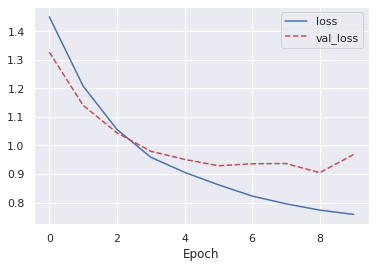

In [ ]:
# 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 모델을 학습하였을 때 train과 validation loss를 비교하였을 때 epoch = 5 일때가 과적합이 일어나지 않는 가장 적합한 epoch으로 판단하였다.

In [ ]:
# 감성 분석 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 128, input_length=train_X.shape[1]),
    tf.keras.layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2), 
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax') # 6개로 분류할 예정이기에 6개 출력층 사용
])

# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 52, 128)           128000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 179,686
Trainable params: 179,686
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
188/188 [==============================] - 45s 225ms/step - loss: 1.4722 - accuracy: 0.4173 - val_loss: 1.2807 - val_accuracy: 0.4990
Epoch 2/5
188/188 [=================

In [ ]:
model.evaluate(val_X, val_Y, verbose=0)

[0.9616853594779968, 0.6711558699607849]

In [ ]:
# 새 데이터 넣고 확인
# https://n.news.naver.com/article/055/0001017423?cds=news_media_pc&type=editn
test_sentence = '''16강 대진표가 하나 둘 추려지고 있는 2022 카타르 월드컵에서 비디오 판독(VAR)이 승패의 변수로 떠오를 만큼 큰 위력을 발휘하고 있습니다. 
오늘(2일) 새벽까지 이어진 2022 카타르 월드컵 44경기 중 판정 반복 사례를 추린 결과, 현재까지 22번의 판정 번복이 발생한 것으로 집계됐습니다. 
이는 'VAR이 판정을 바꾼 사례'만을 추린 것으로, 우리나라와 가나의 경기에서 모하메드 살리수의 첫 골 이후 진행된 'VAR 판독'은 집계에 포함되지 않습니다.'''
test_sentence = test_sentence.split(' ')
test_sentences = [test_sentence]

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=52)
print(test_X_1)
prediction = model.predict(test_X_1)
for pred in prediction[0]:
    print("%0.4f" % pred, end=' ')

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1/1 [==============================] - 0s 53ms/step
0.0162 0.1153 0.6064 0.1118 0.1295 0.0208 

## 새로운 문장을 넣었을 때 스포츠에 대한 카테고리를 기대하고 predict 해보았으나 생활로 나온것을 알 수 있다. 
## 이러한 결과를 통해 아직 모델에 대해 학습이 부족하다는 것을 알 수 있었다.

{0: '경제', 1: '사회', 2: '생활', 3: '스포츠', 4: '연예/문화', 5: '정치'}

```
# 코드로 형식 지정됨
```



## test data를 train data 와 같은 방법으로 전처리를 해주고 모델에 결과를 확인해보았다.

In [ ]:
test_text

,text
0,"""[기자] 지난 24일 국회 국방위원회에서 현역 대령인 기무부대장이 송영무 국방장관..."
1,[IMG1] 한예슬-에릭 커플의 드라마 '스파이명월'의 시청률이 3회연속 하락세를 ...
2,"""디지털 광장입니다. 운전대를 잡는 시간보다 구르고 넘어지는 시간이 더 많은 극한의..."
3,정부가 최저 임금 인상 대책으로 자영업자와 영세사업자에게 지원하는 일자리 안정자금의...
4,청와대가 1박2일간 숨가빴던 방북 일정을 마치고 돌아온 대북특별사절단의 후일담을 8...
...,...
3098,"중국인 왕즈, 명 밀수 차단에일본 터잡고 ‘왜구 약탈’ 솔선 일 기업인들 성금모아 ..."
3099,"""정상회담을 계기로 남북 학술 교류도 다시 시작될 것으로 보입니다. 멸종된 크낙새를..."
3100,중국 베이징시내 한국 일간신문 정기구독자들에게 18일 배달된 이 날짜 신문에서 자오...
3101,"""인터넷전문은행이 출범한 지 1년이 됐는데요. 창구 갈 필요 없고 복잡한 인증절차도..."


In [ ]:
pred_arr = []
for text in test_text.text:
    # print(text)
    text = text.split(' ')
    text = [text]
    text = tokenizer.texts_to_sequences(text)
    text = pad_sequences(text, padding='post', maxlen=52)
    # print(text)
    prediction = model.predict(text)
    idx = np.argmax(prediction[0])
    pred_arr.append(idx)

In [ ]:
for pred in pred_arr[:10]:
    print(pred, end=' ')

5 4 3 1 5 1 1 4 4 5 

In [ ]:
mapp = {0: '경제', 1: '사회', 2: '생활', 3: '스포츠', 4: '연예/문화', 5: '정치'}
conv_pred_arr = []
for pred in pred_arr:
    conv_pred_arr.append(mapp[pred])

In [ ]:
for pred in conv_pred_arr[:10]:
    print(pred, end=' ')

정치 연예/문화 스포츠 사회 정치 사회 사회 연예/문화 연예/문화 정치 

## 대회에서 요구한 조건대로 제출할 데이터 틀을 만들기 위한 작업

In [ ]:
test_text.insert(1, "category", conv_pred_arr)

In [ ]:
test_text.drop('text', axis=1 ,inplace=True)

In [ ]:
test_text

,ID,category
0,0,정치
1,1,연예/문화
2,2,스포츠
3,3,사회
4,4,정치
...,...,...
3098,3098,사회
3099,3099,스포츠
3100,3100,생활
3101,3101,경제


In [ ]:
# 제출 파일 제작
test_text.to_csv(os.path.join('drive/MyDrive/ITStudy/data/', 'sample_pred.csv'), index=False)